In [1]:
#lets load the required packages and libraries for data analysis
import numpy as np 
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#shape of dataset
df.shape

(891, 12)

Here in this dataset we are having 891 rows and 12 columns.

In [5]:
#Let's see the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can see that we are having 2 float columns, 5 int columns and 5 object columns. 

In [7]:
#Let's see the columns name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

first we will drop the columns which we don't need and which is not usefull for further process.

Here we don't need passenger id, ticket and cabin.

Cabin is having more number of nan values so we will drop it.

Passenger id we don't see any relation between passenger id and other columns so that also we will drop.

And ticket also not having relationship between any other columns.

In [12]:
df = df.drop(columns='PassengerId')

In [14]:
df = df.drop(['Ticket', 'Cabin'], axis=1)

In [15]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [20]:
df.loc[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [21]:
#find the mode of Embarked column
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [23]:
print(df['Embarked'].mode()[0])

S


In [24]:
# Replacing the missing values in "Embarked" column with the mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Now we are having null values in Age column so we have to handle.

In [27]:
# Replacing the missing values in "Age" column with mean 
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [28]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
# Now let's see the statistic
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here our data looks better so we can proceed ahead.

In [30]:
# Finding the number of people survived and not survived!
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

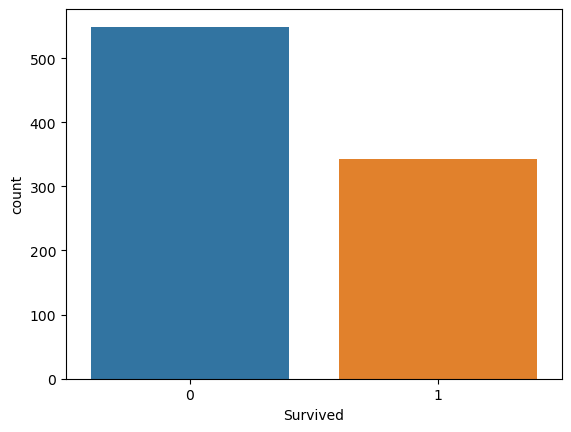

In [31]:
# Count plot for Survived Column
sns.countplot(x='Survived', data=df)

Here survived people are less.

In [32]:
# Converting Categorical Columns 
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [33]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,0
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,0
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,1


converted object into categorical.

In [34]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

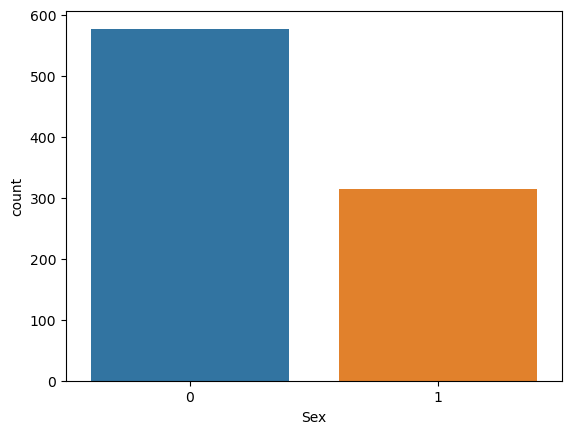

In [35]:
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Sex', ylabel='count'>

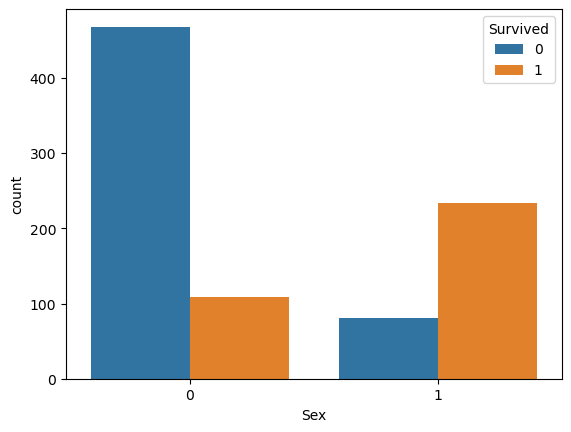

In [36]:
# Number of survivors by Gender wise
sns.countplot(x="Sex", hue="Survived", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

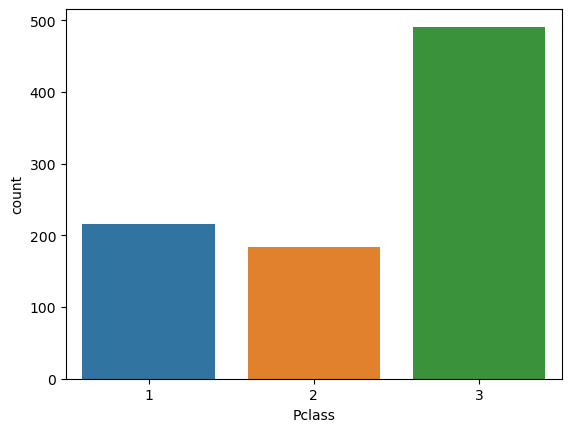

In [37]:
# Creating a Count plot for Pclass Column 
sns.countplot(x="Pclass", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

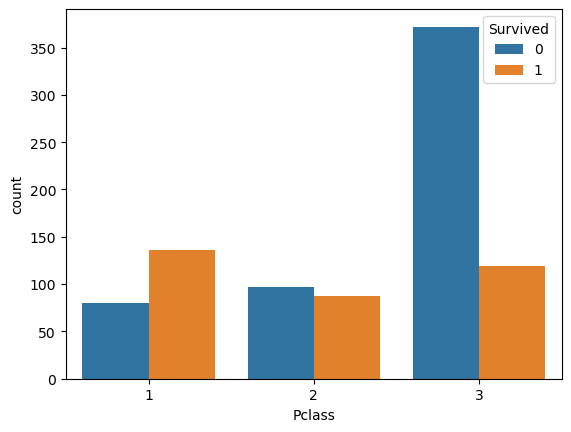

In [38]:
# Number of Survivers by Pclass wise 
sns.countplot(x="Pclass", hue="Survived", data=df)

In [39]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


# Feature Selection

In [40]:
X = df.drop(columns=['Name', 'Survived'])
y = df['Survived']

In [41]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [42]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Standard Scaler to scale the data

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
X_scaled

array([[ 0.82737724, -0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517, -0.56883712],
       [-1.56610693,  1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529,  1.00518113],
       [ 0.82737724,  1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426, -0.56883712],
       ...,
       [ 0.82737724,  1.35557354,  0.        , ...,  2.00893337,
        -0.17626324, -0.56883712],
       [-1.56610693, -0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104,  1.00518113],
       [ 0.82737724, -0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783,  2.57919938]])

In [46]:
# Split data into training and testing fase
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=360)

# Model Building

Logestic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [49]:
test_pred = lr.predict(x_test)
test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1], dtype=int64)

In [50]:
train_pred = lr.predict(x_train)
train_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
from sklearn.metrics import accuracy_score, classification_report

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n=============================== Train Result =============================")
        print(f"Accuracy score : {accuracy_score(y_train, y_pred) * 100: .2f}%")
        
    else:
        pred = clf.predict(x_test)
        
        print("\n=============================== Test Result ===============================")
        print(f"Accuracy score : {accuracy_score(y_test, pred) * 100: .2f}%")
        
        print('\n\nTest Classification Report\n', classification_report(y_test, pred, digits=2))

In [56]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(lr,x_train,x_test,y_train,y_test,train=False) # Testing Score


=============================== Train Result =============================
Accuracy score :  81.06%

=============================== Test Result ===============================
Accuracy score :  77.61%


Test Classification Report
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       162
           1       0.74      0.67      0.70       106

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report,r2_score

predlr = lr.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 77.61194029850746
[[137  25]
 [ 35  71]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       162
           1       0.74      0.67      0.70       106

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print('Test Accuracy', accuracy_score(y_test,predrf)*100)

print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Test Accuracy 80.22388059701493
[[136  26]
 [ 27  79]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       162
           1       0.75      0.75      0.75       106

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [60]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # Testing Score


=============================== Train Result =============================
Accuracy score :  98.72%

=============================== Test Result ===============================
Accuracy score :  80.22%


Test Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       162
           1       0.75      0.75      0.75       106

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



Decision tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
pred_traindt=dt.predict(x_train)
print('Test Accuracy', accuracy_score(y_test,preddt)*100)
print('Train Accuracy', accuracy_score(y_train,pred_traindt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 76.49253731343283
Train Accuracy 98.7158908507223
[[124  38]
 [ 25  81]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       162
           1       0.68      0.76      0.72       106

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.76      0.77       268



In [62]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(dt,x_train,x_test,y_train,y_test,train=False) # Testing Score


=============================== Train Result =============================
Accuracy score :  98.72%

=============================== Test Result ===============================
Accuracy score :  76.49%


Test Classification Report
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       162
           1       0.68      0.76      0.72       106

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.76      0.77       268



SVC

In [63]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print('Test Accuracy', accuracy_score(y_test,predsvc)*100)

print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Test Accuracy 79.8507462686567
[[143  19]
 [ 35  71]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       162
           1       0.79      0.67      0.72       106

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [64]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(svc,x_train,x_test,y_train,y_test,train=False) # Testing Score


=============================== Train Result =============================
Accuracy score :  84.59%

=============================== Test Result ===============================
Accuracy score :  79.85%


Test Classification Report
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       162
           1       0.79      0.67      0.72       106

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



Here random forest classifier is giving good accuracy so we will consider this.

In [66]:
train_accuracy = r2_score(y_train, train_pred)
test_accuracy = r2_score(y_test, test_pred)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf, X, y, cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy}and the accuracy for testing is {test_accuracy}")
    print('\n')

At cross fold 2 the cv score is 0.7811457651030382 and accuracy score for training is 0.19509043927648562and the accuracy for testing is 0.06359189378057306


At cross fold 3 the cv score is 0.7934904601571269 and accuracy score for training is 0.19509043927648562and the accuracy for testing is 0.06359189378057306


At cross fold 4 the cv score is 0.8013523613299398 and accuracy score for training is 0.19509043927648562and the accuracy for testing is 0.06359189378057306


At cross fold 5 the cv score is 0.8092335697696316 and accuracy score for training is 0.19509043927648562and the accuracy for testing is 0.06359189378057306


At cross fold 6 the cv score is 0.8148164943466956 and accuracy score for training is 0.19509043927648562and the accuracy for testing is 0.06359189378057306


At cross fold 7 the cv score is 0.8092836051743532 and accuracy score for training is 0.19509043927648562and the accuracy for testing is 0.06359189378057306


At cross fold 8 the cv score is 0.804828265765

Since, we check the cross validation we observed that at the cross fold 6 we are getting better result.

# Hyper parameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier()

parameters = {'max_features' :['auto','sqrt','log2'],
             'max_depth' :[4,5,6,7,8],
              'criterion' : ['gini', 'entropy'],
              'n_estimators' : [100,200,300,400,500]
             }

GCV = GridSearchCV(estimator =rf,param_grid=parameters,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train) 
GCV.best_params_ #printing the best parameters found by the GridSearchCV

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [68]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with the best parameters
accuracy_score(y_test,GCV_pred) #Checking Final Accuracy

0.8171641791044776

Our result of hyperparameter tuning and cross validation is almost same so our model is giving proper result.

# Saving dataset

In [69]:
import pickle
filename = 'survival_prediction.pkl'
pickle.dump(GCV,open(filename,'wb'))

# Final Conclusion

In [70]:
loaded_model = pickle.load(open('survival_prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

81.71641791044776


In [71]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=['Predicted','Orignal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,0,0,0,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,1,0,1
Orignal,0,0,0,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,1,0,1
